In [1]:
import torch
from torch import nn

import torchvision
from torchvision import transforms
from torchvision.transforms import ToTensor
from torchvision import datasets

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from PIL import Image
import cv2

import os
import json

# 0. Device agnostic

In [2]:
print(torch.__version__)

2.3.1+cu118


In [3]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

# 1. Prepare the dataset

In [4]:
TRAIN_PATH = "data/aug_data/train"
TEST_PATH = "data/aug_data/test"
VAL_PATH = "data/aug_data/val"

## 1.1. Getting the train, test, val images (splitted and augmented)

In [5]:
import glob

train_images = glob.glob("data/aug_data/train/images/*.jpg")
test_images = glob.glob("data/aug_data/test/images/*.jpg")
val_images = glob.glob("data/aug_data/val/images/*.jpg")

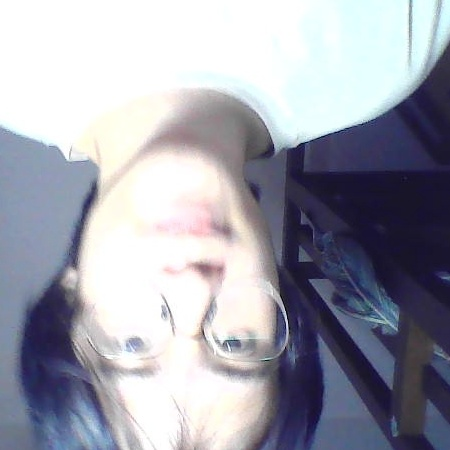

In [6]:
sample = Image.open(train_images[0])
sample

In [7]:
sample_tensor = ToTensor()(sample)
print(sample_tensor)
print(f"Tensor shape: {sample_tensor.shape}")

tensor([[[1.0000, 1.0000, 1.0000,  ..., 0.8588, 0.8471, 0.8510],
         [1.0000, 1.0000, 1.0000,  ..., 0.8392, 0.8471, 0.8431],
         [1.0000, 1.0000, 1.0000,  ..., 0.8471, 0.8471, 0.8549],
         ...,
         [0.4196, 0.4235, 0.4353,  ..., 0.2627, 0.2667, 0.2667],
         [0.4235, 0.4314, 0.4275,  ..., 0.2627, 0.2627, 0.2706],
         [0.4235, 0.4314, 0.4275,  ..., 0.2627, 0.2706, 0.2784]],

        [[1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 0.9804, 0.9882, 0.9961],
         [1.0000, 1.0000, 1.0000,  ..., 0.9882, 0.9882, 0.9961],
         ...,
         [0.4510, 0.4549, 0.4588,  ..., 0.3176, 0.3216, 0.3216],
         [0.4471, 0.4549, 0.4588,  ..., 0.3255, 0.3176, 0.3216],
         [0.4471, 0.4549, 0.4588,  ..., 0.3255, 0.3255, 0.3294]],

        [[1.0000, 1.0000, 1.0000,  ..., 1.0000, 0.9961, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 0.9804, 0.9882, 0.9922],
         [1.0000, 1.0000, 1.0000,  ..., 0.9882, 0.9882, 0.

### 1.1.1. Transform the images

In [8]:
image_transform = transforms.Compose([
    transforms.Resize((120, 120)),
    transforms.ToTensor()
])

Original Image shape: (450, 450, 3)
Original Image type: uint8
Transformed Image shape: torch.Size([3, 120, 120])
Transformed Image type: torch.float32


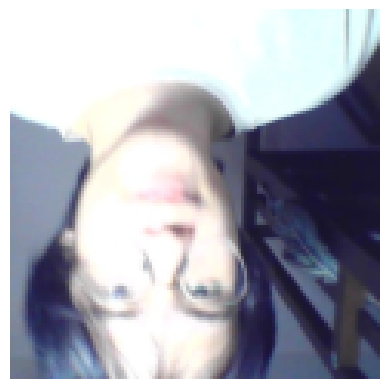

In [9]:
# Plot transformed image

def plot_transformed_image(image_path):
    image = Image.open(image_path)
    image_tensor = image_transform(image)
    plt.imshow(image_tensor.squeeze().permute(1, 2, 0))

    # Print metadata
    print("Original Image shape:", np.array(image).shape)
    print("Original Image type:", np.array(image).dtype)
    print("Transformed Image shape:", image_tensor.shape)
    print("Transformed Image type:", image_tensor.dtype)

    plt.axis("off")

plot_transformed_image(train_images[0])

## 1.2. Retrieving labels

In [10]:
# Get coords
label_path = "data/aug_data/train/labels/8a6d3ee0-4344-11ef-87af-f854f63b872e.0.json"
with open(label_path, "r") as f:
    label = json.load(f)

coords = [0, 0, 0, 0]
coords[0] = label['shapes'][0]['points'][0][0]
coords[1] = label['shapes'][0]['points'][0][1]
coords[2] = label['shapes'][0]['points'][1][0]
coords[3] = label['shapes'][0]['points'][1][1]
coords = list(np.divide(coords, [640, 480, 640, 480]))
coords = torch.tensor(coords).type(torch.float32)
coords

KeyError: 'shapes'

In [ ]:
# 0. Create CSV file
if not os.path.exists(f"data/pytorch-facerec.csv"):
    os.makedirs(f"data/pytorch-facerec.csv")

    with open(f"data/pytorch-facerec.csv", 'w') as f:
        f.write("image, coords\n")

# 1. Loop through each directory
for partition in ['train', 'test', 'val']:  
    # 2. Loop through each image in each directory
    for image in os.listdir(os.path.join(f"data/{partition}/images")):      
        # 3. Read image
        img = cv2.imread(os.path.join(f"data/{partition}/images", image))
        coords = [0, 0, 0.00001, 0.00001]
        # 4. Read label
        label_path = os.path.join(f"data/{partition}/labels", image.replace(".jpg", ".json"))
        if os.path.exists(label_path):
            with open(label_path, 'r') as f:
                label = json.load(f)
            coords[0] = label['shapes'][0]['points'][0][0]
            coords[1] = label['shapes'][0]['points'][0][1]
            coords[2] = label['shapes'][0]['points'][1][0]
            coords[3] = label['shapes'][0]['points'][1][1]
            coords = list(torch.divide(coords, [640, 480, 640, 480]))
            coords = torch.tensor(coords).type(torch.float32)
        
        # 5. Write to CSV image & coords
        try:
            with open(f"data/pytorch-facerec.csv", 'a') as f:
                f.write(f"{image}, {coords}\n")
        except Exception as e:
            print(f"Error writing {image}: {e}")

        # 6. Process image
        try:
            for x in range(60):
                
        except Exception as e:
            print(f"Error processing {image}: {e}")
        

IndentationError: expected an indented block after 'try' statement on line 23 (337339194.py, line 25)